In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats

In [3]:
import geopandas

In [4]:
import geoplot

In [5]:
import mapclassify

In [6]:
import folium

In [7]:
import plotly.plotly as pl
import plotly.graph_objs as gobj


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [8]:
world=geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

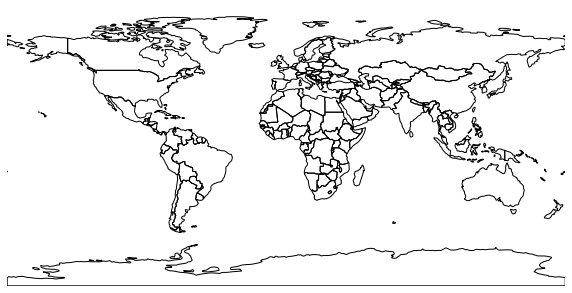

In [9]:
geoplot.polyplot(world, figsize=(10,10))

In [10]:
raw_gdp_df=pd.read_csv('/home/vamsi/Downloads/Srinivas/gdp.csv', skiprows=4)

In [11]:
raw_gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.262389e+09,6.477787e+09,6.556957e+09,6.825477e+09,7.103339e+09,7.403500e+09,7.685989e+09,8.006622e+09,NaN,NaN
260,"Yemen, Rep.",YEM,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.762254e+10,2.895489e+10,2.890028e+10,2.080981e+10,1.885888e+10,1.790235e+10,1.803709e+10,NaN,NaN,NaN
261,South Africa,ZAF,GDP (constant 2010 US$),NY.GDP.MKTP.KD,7.907096e+10,8.211104e+10,8.718376e+10,9.361236e+10,1.010450e+11,1.072317e+11,...,3.962572e+11,4.061050e+11,4.136057e+11,4.185431e+11,4.202134e+11,4.261574e+11,4.295115e+11,4.301669e+11,NaN,NaN
262,Zambia,ZMB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,4.592976e+09,4.655504e+09,4.539543e+09,4.688094e+09,5.260700e+09,6.136473e+09,...,2.301863e+10,2.418280e+10,2.531884e+10,2.605814e+10,2.704230e+10,2.798995e+10,2.911929e+10,2.961601e+10,NaN,NaN


In [12]:
raw_gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,1.180000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.280000e+02,1.320000e+02,1.330000e+02,1.370000e+02,1.370000e+02,...,2.470000e+02,2.470000e+02,2.460000e+02,2.450000e+02,2.440000e+02,2.440000e+02,2.380000e+02,2.220000e+02,0.0,0.0
mean,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,8.720855e+11,...,2.303293e+12,2.373206e+12,2.456917e+12,2.540814e+12,2.625478e+12,2.719552e+12,2.864567e+12,3.154333e+12,NaN,NaN
std,1.821041e+12,1.873787e+12,1.979872e+12,2.086347e+12,2.224496e+12,2.296070e+12,2.398362e+12,2.499331e+12,2.620008e+12,2.774689e+12,...,7.762187e+12,7.959100e+12,8.195997e+12,8.447790e+12,8.681360e+12,8.967239e+12,9.351915e+12,9.894546e+12,NaN,NaN
min,9.937234e+07,1.042339e+08,1.093337e+08,1.147528e+08,1.204903e+08,1.264311e+08,1.324629e+08,1.363826e+08,1.452607e+08,1.494164e+08,...,3.290294e+07,3.440885e+07,3.487269e+07,3.806106e+07,3.921611e+07,4.082163e+07,4.184217e+07,4.592433e+07,NaN,NaN
25%,3.467395e+09,3.733983e+09,3.967419e+09,4.014336e+09,4.019879e+09,4.428296e+09,4.514931e+09,4.769609e+09,5.009745e+09,5.229035e+09,...,8.570529e+09,9.149887e+09,9.998865e+09,1.035808e+10,1.094002e+10,1.137990e+10,1.225985e+10,1.403730e+10,NaN,NaN
50%,2.817010e+10,2.696066e+10,2.890090e+10,3.075947e+10,3.291115e+10,3.142094e+10,2.597532e+10,2.670031e+10,3.318952e+10,3.598848e+10,...,4.493365e+10,4.680715e+10,4.806137e+10,4.916596e+10,5.229079e+10,5.497840e+10,5.649900e+10,6.816900e+10,NaN,NaN
75%,2.466067e+11,2.302431e+11,2.300005e+11,2.432619e+11,2.671948e+11,2.599948e+11,2.531799e+11,2.659457e+11,2.856024e+11,3.220621e+11,...,5.100546e+11,5.166349e+11,5.339354e+11,5.563612e+11,5.912976e+11,6.154337e+11,6.227448e+11,9.122954e+11,NaN,NaN
max,1.135594e+13,1.184867e+13,1.249938e+13,1.316831e+13,1.405267e+13,1.482459e+13,1.567496e+13,1.638577e+13,1.742802e+13,1.849982e+13,...,6.990555e+13,7.176709e+13,7.381063e+13,7.593575e+13,7.790414e+13,8.044535e+13,8.289275e+13,8.494441e+13,NaN,NaN


In [13]:
raw_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            118 non-null    float64
 5   1961            122 non-null    float64
 6   1962            122 non-null    float64
 7   1963            122 non-null    float64
 8   1964            122 non-null    float64
 9   1965            128 non-null    float64
 10  1966            132 non-null    float64
 11  1967            133 non-null    float64
 12  1968            137 non-null    float64
 13  1969            137 non-null    float64
 14  1970            153 non-null    float64
 15  1971            153 non-null    float64
 16  1972            153 non-null    float64
 17  1973            153 non-null    flo

In [14]:
raw_gdp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [15]:
raw_gdp_df[['Unnamed: 65','2020']]

,Unnamed: 65,2020
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
259,NaN,NaN
260,NaN,NaN
261,NaN,NaN
262,NaN,NaN


Dropping some unnecessary columns from the dataset.

In [16]:
raw_gdp_df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65', '2020'], axis=1, inplace=True)

In [17]:
#Finding null values count per each feature.
# Plot missing values using  package missingno

In [18]:
raw_gdp_df.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

Let us drop the records which have null values present across all years.

In [19]:
raw_gdp_df.dropna(how='all', inplace=True)

In [20]:
gdp_df=raw_gdp_df.dropna(thresh=2)

In [21]:
gdp_df.shape

(252, 61)

In [22]:
pd.options.display.max_rows=260

In [23]:
gdp_df.reset_index(inplace=True, drop=True)
gdp_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,Argentina,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,NaN


In [24]:
gdp_df.shape


(252, 61)

In [ ]:
pd.options.display.max_rows=65

In [25]:
null_count_df=pd.DataFrame(data=gdp_df.isnull().sum(),columns=['null_count'])
null_count_df

,null_count
Country Name,0
1960,134
1961,130
1962,130
1963,130
1964,130
1965,124
1966,120
1967,119
1968,115


From above, we can observe almost allthe years are having null records. 

In [26]:
gdp_df_corr=gdp_df.corr()


In [27]:
gdp_df_corr

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1960,1.000000,0.999954,0.999910,0.999865,0.999857,0.999869,0.999801,0.999665,0.999543,0.999345,...,0.970551,0.966467,0.962304,0.958087,0.954968,0.952587,0.949062,0.945524,0.941920,0.938372
1961,0.999954,1.000000,0.999986,0.999967,0.999959,0.999954,0.999900,0.999818,0.999723,0.999550,...,0.969386,0.965218,0.960963,0.956668,0.953488,0.951061,0.947483,0.943898,0.940238,0.936635
1962,0.999910,0.999986,1.000000,0.999990,0.999972,0.999969,0.999934,0.999863,0.999766,0.999579,...,0.968420,0.964180,0.959859,0.955501,0.952277,0.949821,0.946199,0.942570,0.938867,0.935224
1963,0.999865,0.999967,0.999990,1.000000,0.999987,0.999979,0.999953,0.999904,0.999818,0.999650,...,0.968212,0.963950,0.959606,0.955231,0.951998,0.949541,0.945914,0.942280,0.938565,0.934912
1964,0.999857,0.999959,0.999972,0.999987,1.000000,0.999995,0.999971,0.999941,0.999881,0.999750,...,0.969079,0.964864,0.960570,0.956242,0.953038,0.950604,0.947011,0.943409,0.939722,0.936095
1965,0.999869,0.999954,0.999969,0.999979,0.999995,1.000000,0.999985,0.999946,0.999884,0.999747,...,0.969414,0.965227,0.960967,0.956671,0.953493,0.951078,0.947509,0.943931,0.940225,0.936623
1966,0.999801,0.999900,0.999934,0.999953,0.999971,0.999985,1.000000,0.999975,0.999921,0.999783,...,0.969141,0.964928,0.960655,0.956346,0.953161,0.950745,0.947167,0.943582,0.939880,0.936277
1967,0.999665,0.999818,0.999863,0.999904,0.999941,0.999946,0.999975,1.000000,0.999981,0.999888,...,0.969015,0.964784,0.960488,0.956163,0.952964,0.950537,0.946955,0.943365,0.939654,0.936037
1968,0.999543,0.999723,0.999766,0.999818,0.999881,0.999884,0.999921,0.999981,1.000000,0.999954,...,0.969512,0.965311,0.961043,0.956750,0.953565,0.951149,0.947584,0.944018,0.940334,0.936733
1969,0.999345,0.999550,0.999579,0.999650,0.999750,0.999747,0.999783,0.999888,0.999954,1.000000,...,0.970798,0.966679,0.962479,0.958257,0.955117,0.952729,0.949221,0.945712,0.942079,0.938521


From the above we can notice that the years are higly correlated with each other.

In [28]:
gdp_df.iloc[:,4:]

,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012347e+09,1.059415e+09,1.145755e+09,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,1.641741e+11,1.691742e+11,1.787463e+11,1.816571e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,NaN


<h3>Data Imputation</h3>

Extracting numerical features from the data

In [29]:
years = []
for feature in gdp_df.select_dtypes(['int64','float64']):
    years.append(feature)

In [30]:
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

Imputing the null values present in Numerical Variables using "SimpleImputer" method

In [31]:
from sklearn.impute import SimpleImputer


Inorder to access this "SimpleImputer" method we need to assign it to a variable

In [32]:
num_si=SimpleImputer()

"fit_transform" function performs the two operations respectively:- Firstly, it fits the parameters on the data and thereby transforms it into an array. SimpleImputer too makes use of this function.

In [33]:
imputed_numerical_gdp=num_si.fit_transform(gdp_df[years])

Now, all the null values in each numerical column is replced by column mean. Passing the transformed columns to a dataframe.

In [34]:
imputed_numerical_gdp_df=pd.DataFrame(imputed_numerical_gdp,columns=years)
imputed_numerical_gdp_df.insert(0,'Country Name',gdp_df['Country Name'])
imputed_numerical_gdp_df


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,2.864567e+12,3.154333e+12
1,Afghanistan,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,Angola,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,Albania,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,Andorra,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,Arab World,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,United Arab Emirates,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,Argentina,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,Armenia,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,American Samoa,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,3.154333e+12


In [35]:
imputed_numerical_gdp_df.head(10)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,2.864567e+12,3.154333e+12
1,Afghanistan,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10
2,Angola,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10
3,Albania,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10
4,Andorra,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09
5,Arab World,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.106021e+12,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12
6,United Arab Emirates,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.897873e+11,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11
7,Argentina,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,...,4.236274e+11,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11
8,Armenia,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10
9,American Samoa,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,3.154333e+12


In [36]:
imputed_numerical_gdp_df.isnull().sum().sort_values(ascending=False)

2019            0
1988            0
1986            0
1985            0
1984            0
1983            0
1982            0
1981            0
1980            0
1979            0
1978            0
1977            0
1976            0
1975            0
1974            0
1973            0
1972            0
1971            0
1970            0
1969            0
1968            0
1967            0
1966            0
1965            0
1964            0
1963            0
1962            0
1961            0
1960            0
1987            0
1989            0
2018            0
1990            0
2017            0
2016            0
2015            0
2014            0
2013            0
2012            0
2011            0
2010            0
2009            0
2008            0
2007            0
2006            0
2005            0
2004            0
2003            0
2002            0
2001            0
2000            0
1999            0
1998            0
1997            0
1996            0
1995      

Population Data

In [37]:
raw_pop_df = pd.read_csv('/home/vamsi/Downloads/Srinivas/pop.csv', skiprows=4)

In [38]:
raw_pop_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


In [39]:
raw_pop_df.drop(['Country Code', 'Indicator Name', 'Indicator Code','2020', 'Unnamed: 65'], axis=1, inplace=True)

In [40]:
raw_pop_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,20942145.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,3918872.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


In [46]:
pop_df=raw_pop_df.dropna(thresh=2)

In [47]:
pop_df.shape

(263, 61)

Here in Population data set all the countries are having atleast one year data

Reindexing Population dataset index as per the GDP dataset index

In [48]:
gdp_df.index

RangeIndex(start=0, stop=252, step=1)

In [52]:
pop_df=gdp_df[['Country Name']].join(pop_df.set_index('Country Name'),on='Country Name', how='left')

In [53]:
pop_df


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,...,1.016690e+05,1.020460e+05,1.025600e+05,1.031590e+05,1.037740e+05,1.043410e+05,1.048720e+05,1.053660e+05,1.058450e+05,1.063140e+05
1,Afghanistan,8.996973e+06,9.169410e+06,9.351441e+06,9.543205e+06,9.744781e+06,9.956320e+06,1.017484e+07,1.039993e+07,1.063706e+07,...,2.918551e+07,3.011741e+07,3.116138e+07,3.226959e+07,3.337079e+07,3.441360e+07,3.538313e+07,3.629640e+07,3.717239e+07,3.804175e+07
2,Angola,5.454933e+06,5.531472e+06,5.608539e+06,5.679458e+06,5.735044e+06,5.770570e+06,5.781214e+06,5.774243e+06,5.771652e+06,...,2.335625e+07,2.422066e+07,2.510793e+07,2.601578e+07,2.694178e+07,2.788438e+07,2.884248e+07,2.981675e+07,3.080976e+07,3.182530e+07
3,Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,...,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06
4,Andorra,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,2.189000e+04,...,8.444900e+04,8.374700e+04,8.242700e+04,8.077400e+04,7.921300e+04,7.801100e+04,7.729700e+04,7.700100e+04,7.700600e+04,7.714200e+04
5,Arab World,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,1.087586e+08,1.118994e+08,1.151362e+08,...,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08,4.278703e+08
6,United Arab Emirates,9.241800e+04,1.007960e+05,1.121180e+05,1.251300e+05,1.380390e+05,1.498570e+05,1.599760e+05,1.697710e+05,1.826270e+05,...,8.549988e+06,8.946777e+06,9.141596e+06,9.197910e+06,9.214175e+06,9.262900e+06,9.360980e+06,9.487203e+06,9.630959e+06,9.770529e+06
7,Argentina,2.048178e+07,2.081727e+07,2.115305e+07,2.148891e+07,2.182442e+07,2.215965e+07,2.249404e+07,2.282887e+07,2.316827e+07,...,4.078845e+07,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07
8,Armenia,1.874121e+06,1.941492e+06,2.009526e+06,2.077578e+06,2.145001e+06,2.211319e+06,2.276034e+06,2.339127e+06,2.401143e+06,...,2.877319e+06,2.876538e+06,2.884229e+06,2.897584e+06,2.912403e+06,2.925553e+06,2.936146e+06,2.944809e+06,2.951776e+06,2.957731e+06
9,American Samoa,2.012300e+04,2.060200e+04,2.125300e+04,2.203400e+04,2.285400e+04,2.367200e+04,2.446200e+04,2.524800e+04,2.598900e+04,...,5.607900e+04,5.575900e+04,5.566700e+04,5.571300e+04,5.579100e+04,5.581200e+04,5.574100e+04,5.562000e+04,5.546500e+04,5.531200e+04


In [54]:
pop_df.shape

(252, 61)

In [55]:
years = []
for feature in pop_df.select_dtypes(['int64','float64']):
    years.append(feature)

In [56]:
imputed_numerical_pop=num_si.fit_transform(pop_df[years])

In [57]:
imputed_numerical_pop_df=pd.DataFrame(imputed_numerical_pop,columns=years)
imputed_numerical_pop_df.insert(0,'Country Name',pop_df['Country Name'])
imputed_numerical_pop_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,...,1.016690e+05,1.020460e+05,1.025600e+05,1.031590e+05,1.037740e+05,1.043410e+05,1.048720e+05,1.053660e+05,1.058450e+05,1.063140e+05
1,Afghanistan,8.996973e+06,9.169410e+06,9.351441e+06,9.543205e+06,9.744781e+06,9.956320e+06,1.017484e+07,1.039993e+07,1.063706e+07,...,2.918551e+07,3.011741e+07,3.116138e+07,3.226959e+07,3.337079e+07,3.441360e+07,3.538313e+07,3.629640e+07,3.717239e+07,3.804175e+07
2,Angola,5.454933e+06,5.531472e+06,5.608539e+06,5.679458e+06,5.735044e+06,5.770570e+06,5.781214e+06,5.774243e+06,5.771652e+06,...,2.335625e+07,2.422066e+07,2.510793e+07,2.601578e+07,2.694178e+07,2.788438e+07,2.884248e+07,2.981675e+07,3.080976e+07,3.182530e+07
3,Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,...,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,2.873457e+06,2.866376e+06,2.854191e+06
4,Andorra,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,2.189000e+04,...,8.444900e+04,8.374700e+04,8.242700e+04,8.077400e+04,7.921300e+04,7.801100e+04,7.729700e+04,7.700100e+04,7.700600e+04,7.714200e+04
5,Arab World,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,1.087586e+08,1.118994e+08,1.151362e+08,...,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08,4.278703e+08
6,United Arab Emirates,9.241800e+04,1.007960e+05,1.121180e+05,1.251300e+05,1.380390e+05,1.498570e+05,1.599760e+05,1.697710e+05,1.826270e+05,...,8.549988e+06,8.946777e+06,9.141596e+06,9.197910e+06,9.214175e+06,9.262900e+06,9.360980e+06,9.487203e+06,9.630959e+06,9.770529e+06
7,Argentina,2.048178e+07,2.081727e+07,2.115305e+07,2.148891e+07,2.182442e+07,2.215965e+07,2.249404e+07,2.282887e+07,2.316827e+07,...,4.078845e+07,4.126149e+07,4.173327e+07,4.220294e+07,4.266950e+07,4.313197e+07,4.359037e+07,4.404481e+07,4.449450e+07,4.493871e+07
8,Armenia,1.874121e+06,1.941492e+06,2.009526e+06,2.077578e+06,2.145001e+06,2.211319e+06,2.276034e+06,2.339127e+06,2.401143e+06,...,2.877319e+06,2.876538e+06,2.884229e+06,2.897584e+06,2.912403e+06,2.925553e+06,2.936146e+06,2.944809e+06,2.951776e+06,2.957731e+06
9,American Samoa,2.012300e+04,2.060200e+04,2.125300e+04,2.203400e+04,2.285400e+04,2.367200e+04,2.446200e+04,2.524800e+04,2.598900e+04,...,5.607900e+04,5.575900e+04,5.566700e+04,5.571300e+04,5.579100e+04,5.581200e+04,5.574100e+04,5.562000e+04,5.546500e+04,5.531200e+04


In [58]:
per_capita_df=imputed_numerical_gdp_df.iloc[:,1:].div(imputed_numerical_pop_df.iloc[:,1:])
per_capita_df.insert(0,'Country Name',pop_df['Country Name'])
per_capita_df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,1.135272e+07,1.119723e+07,1.162964e+07,1.213734e+07,1.288916e+07,1.295016e+07,1.318238e+07,1.357683e+07,1.403457e+07,...,23512.602596,2.423300e+04,2.378126e+04,2.463576e+04,2.456323e+04,2.582225e+04,2.623103e+04,2.663021e+04,2.706379e+07,2.966997e+07
1,Afghanistan,6.840550e+04,6.769812e+04,6.992256e+04,7.210646e+04,7.543470e+04,7.460798e+04,7.477479e+04,7.578927e+04,7.703463e+04,...,543.303042,5.287366e+02,5.761901e+02,5.875651e+02,5.836562e+02,5.741841e+02,5.710738e+02,5.715425e+02,5.683429e+02,5.714666e+02
2,Angola,1.128231e+05,1.122218e+05,1.165859e+05,1.211606e+05,1.281759e+05,1.287258e+05,1.316023e+05,1.365032e+05,1.419736e+05,...,3587.883798,3.579960e+03,3.748449e+03,3.796883e+03,3.843198e+03,3.748321e+03,3.530309e+03,3.409929e+03,3.233907e+03,3.103496e+03
3,Albania,3.825475e+05,3.739919e+05,3.820893e+05,3.903997e+05,4.052040e+05,3.983401e+05,3.973843e+05,4.009990e+05,4.051988e+05,...,4094.350334,4.209875e+03,4.276608e+03,4.327380e+03,4.413297e+03,4.524373e+03,4.681827e+03,4.864311e+03,5.074857e+03,5.209363e+03
4,Andorra,4.589087e+07,4.318273e+07,4.254240e+07,4.192827e+07,4.207995e+07,4.004642e+07,3.872455e+07,3.797104e+07,3.743363e+07,...,40852.666777,4.119179e+04,3.976956e+04,3.914369e+04,4.091473e+04,4.214096e+04,4.410796e+04,4.443074e+04,4.513371e+04,4.588730e+04
5,Arab World,6.675244e+03,6.553233e+03,6.717834e+03,6.878916e+03,7.148448e+03,7.025213e+03,6.995503e+03,7.043854e+03,7.116983e+03,...,5934.290684,6.020487e+03,6.274111e+03,6.333027e+03,6.350838e+03,6.418029e+03,6.506271e+03,6.454460e+03,6.465474e+03,6.437167e+03
6,United Arab Emirates,6.659336e+06,6.158496e+06,5.832040e+06,5.499295e+06,5.325268e+06,4.956865e+06,4.755846e+06,4.642741e+06,4.486863e+06,...,33893.303514,3.463486e+04,3.541689e+04,3.697883e+04,3.849505e+04,4.024775e+04,4.104511e+04,4.146028e+04,4.132738e+04,4.142048e+04
7,Argentina,5.642765e+03,5.853172e+03,5.711179e+03,5.323494e+03,5.772650e+03,6.286229e+03,6.151926e+03,6.255184e+03,6.460787e+03,...,10385.964432,1.088332e+04,1.064984e+04,1.078463e+04,1.039869e+04,1.056816e+04,1.023948e+04,1.040426e+04,1.004351e+04,9.729142e+03
8,Armenia,3.283899e+05,3.197293e+05,3.253885e+05,3.312158e+05,3.427013e+05,3.359176e+05,3.342750e+05,3.369645e+05,3.412634e+05,...,3218.372707,3.370551e+03,3.603596e+03,3.705357e+03,3.819218e+03,3.923717e+03,3.917380e+03,4.198795e+03,4.406706e+03,4.732070e+03
9,American Samoa,3.058403e+07,3.013066e+07,3.076632e+07,3.123022e+07,3.216481e+07,3.137973e+07,3.110217e+07,3.121843e+07,3.152958e+07,...,10271.224523,1.036051e+04,9.921806e+03,9.640344e+03,9.717829e+03,9.850565e+03,9.589980e+03,9.048183e+03,9.271712e+03,5.702801e+07


Calulating percapita Income

Per Capita for the year 2005

In [59]:
per_capita_2005=per_capita_df['2005']

In [60]:
per_capita_2005

0      2.697989e+04
1      3.572347e+02
2      2.883979e+03
3      3.062674e+03
4      4.688081e+04
5      5.400540e+03
6      5.609292e+04
7      8.577865e+03
8      2.571547e+03
9      1.056523e+04
10     1.409710e+04
11     4.881389e+04
12     4.463786e+04
13     2.948206e+03
14     2.210964e+02
15     4.264168e+04
16     9.893723e+02
17     5.763717e+02
18     6.175427e+02
19     5.607713e+03
20     2.206621e+04
21     3.144228e+04
22     3.967195e+03
23     4.164186e+03
24     4.311500e+03
25     8.761639e+04
26     1.700183e+03
27     9.535419e+03
28     1.621653e+04
29     3.632950e+04
30     1.504456e+03
31     5.686781e+03
32     4.175019e+02
33     4.447108e+04
34     1.071610e+04
35     7.047144e+04
36     1.122508e+04
37     2.732166e+03
38     1.216187e+03
39     1.243081e+03
40     3.005624e+02
41     2.571786e+03
42     5.404123e+03
43     1.287869e+03
44     2.705135e+03
45     6.892923e+03
46     8.625090e+03
47     4.393830e+03
48     3.763398e+07
49     2.196113e+04


In [67]:
scheme = mapclassify.Quantiles(per_capita_df['2005'], k=5)

<AxesSubplot:>

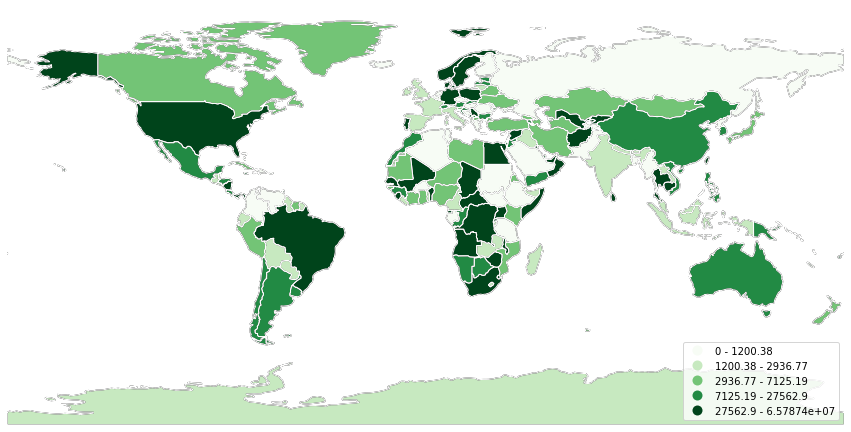

In [68]:
ax=geoplot.choropleth(
    world, hue=per_capita_2005, scheme=scheme,
    cmap='Greens', figsize=(15, 8), legend=True
)

geoplot.polyplot(world, edgecolor='white', zorder=1, ax=ax)

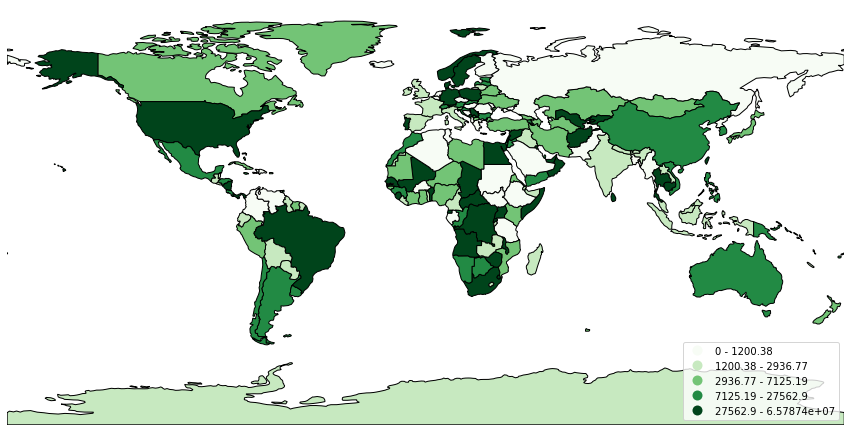

In [69]:
ax=geoplot.choropleth(
    world, hue=per_capita_df['2005'], scheme=scheme,
    
    cmap='Greens', figsize=(15, 8), legend=True,
)


In [ ]:
layout = dict(geo = {'scope':'world'})

In [ ]:
data = dict(type = 'choropleth',
            locations = per_capita_df['Country Name'],
            locationmode = 'country names',
            #colorscale= 'Portland',
            #text= ['IND','NEP','CHI','PAK','BAN','BHU', 'MYN','SLK'],
            #z=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
            z=per_capita_2005,
            #colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' }
           )

For year 2015, plot the GDP per capita for only the countries having populations greater than 300000000. Interpret the data( generated plot)

In [78]:
imputed_numerical_pop_df[imputed_numerical_pop_df['2015'].gt(300000000)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Arab World,9.219775e+07,9.472451e+07,9.733444e+07,1.000342e+08,1.028328e+08,1.057364e+08,1.087586e+08,1.118994e+08,1.151362e+08,...,3.548900e+08,3.631587e+08,3.714435e+08,3.797057e+08,3.879077e+08,3.960283e+08,4.040244e+08,4.118990e+08,4.197906e+08,4.278703e+08
37,China,6.670700e+08,6.603300e+08,6.657700e+08,6.823350e+08,6.983550e+08,7.151850e+08,7.354000e+08,7.545500e+08,7.745100e+08,...,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09,1.397715e+09
57,East Asia & Pacific (excluding high income),8.948757e+08,8.944795e+08,9.064139e+08,9.296347e+08,9.524942e+08,9.763606e+08,1.003800e+09,1.030341e+09,1.057849e+09,...,1.965954e+09,1.980036e+09,1.994391e+09,2.008921e+09,2.023597e+09,2.038190e+09,2.053104e+09,2.068143e+09,2.081639e+09,2.093675e+09
58,Early-demographic dividend,9.800034e+08,1.003195e+09,1.027205e+09,1.051973e+09,1.077531e+09,1.103860e+09,1.130948e+09,1.158861e+09,1.187475e+09,...,2.907917e+09,2.951429e+09,2.994364e+09,3.037111e+09,3.079709e+09,3.122157e+09,3.164387e+09,3.206361e+09,3.248239e+09,3.290291e+09
59,East Asia & Pacific,1.040958e+09,1.044545e+09,1.059019e+09,1.084796e+09,1.110214e+09,1.136691e+09,1.166600e+09,1.195270e+09,1.224531e+09,...,2.206885e+09,2.221673e+09,2.236819e+09,2.252047e+09,2.267482e+09,2.282856e+09,2.298486e+09,2.314098e+09,2.328138e+09,2.340628e+09
60,Europe & Central Asia (excluding high income),2.562403e+08,2.603763e+08,2.645624e+08,2.687668e+08,2.729597e+08,2.770955e+08,2.804976e+08,2.838327e+08,2.871347e+08,...,3.778358e+08,3.801651e+08,3.825098e+08,3.850888e+08,3.876608e+08,3.902957e+08,3.928705e+08,3.952897e+08,3.974351e+08,3.994046e+08
61,Europe & Central Asia,6.667533e+08,6.744506e+08,6.823978e+08,6.904117e+08,6.983556e+08,7.060705e+08,7.128303e+08,7.194060e+08,7.257253e+08,...,8.879268e+08,8.901627e+08,8.937886e+08,8.980604e+08,9.024068e+08,9.067074e+08,9.109048e+08,9.145855e+08,9.179226e+08,9.211401e+08
64,Euro area,2.652039e+08,2.676211e+08,2.701101e+08,2.726554e+08,2.751634e+08,2.776510e+08,2.799690e+08,2.819749e+08,2.838664e+08,...,3.361515e+08,3.354196e+08,3.361592e+08,3.373021e+08,3.384622e+08,3.394884e+08,3.404818e+08,3.411636e+08,3.418432e+08,3.425977e+08
65,Eritrea,1.007590e+06,1.033328e+06,1.060486e+06,1.088854e+06,1.118159e+06,1.148189e+06,1.178875e+06,1.210302e+06,1.242635e+06,...,3.170435e+06,3.213972e+06,2.982565e+08,3.020555e+08,3.058897e+08,3.097380e+08,3.136175e+08,3.174932e+08,3.213008e+08,3.250629e+08
69,European Union,3.569061e+08,3.599984e+08,3.632005e+08,3.665165e+08,3.698502e+08,3.730327e+08,3.760391e+08,3.789180e+08,3.816054e+08,...,4.415324e+08,4.407470e+08,4.413959e+08,4.424695e+08,4.435767e+08,4.445438e+08,4.454877e+08,4.461313e+08,4.467777e+08,4.475120e+08


In [79]:
per_capita_df[['2005','Country Name']]

,2005,Country Name
0,2.697989e+04,Aruba
1,3.572347e+02,Afghanistan
2,2.883979e+03,Angola
3,3.062674e+03,Albania
4,4.688081e+04,Andorra
5,5.400540e+03,Arab World
6,5.609292e+04,United Arab Emirates
7,8.577865e+03,Argentina
8,2.571547e+03,Armenia
9,1.056523e+04,American Samoa


GDP per capita for only the countries having populations greater than 300000000 in year 2015

In [80]:
countries_pop_gt_300m = imputed_numerical_pop_df[imputed_numerical_pop_df['2015'].gt(300000000)][['2015','Country Name']]

In [81]:
per_capita_2015_df=per_capita_df[['Country Name', '2015']]
per_capita_2015_df

,Country Name,2015
0,Aruba,2.582225e+04
1,Afghanistan,5.741841e+02
2,Angola,3.748321e+03
3,Albania,4.524373e+03
4,Andorra,4.214096e+04
5,Arab World,6.418029e+03
6,United Arab Emirates,4.024775e+04
7,Argentina,1.056816e+04
8,Armenia,3.923717e+03
9,American Samoa,9.850565e+03


In [82]:
per_capita_for_countries_pop_gt_300m=countries_pop_gt_300m[['Country Name']].join(per_capita_2015_df.set_index('Country Name'), on='Country Name', how='left')
# countries_gt_300m.join(per_capita_2015_df.set_index('Country Name'), on='Country Name', how='left', lsuffix='_population', rsuffix='_Percapita')
per_capita_for_countries_pop_gt_300m

,Country Name,2015
5,Arab World,6418.028694
37,China,6500.281937
57,East Asia & Pacific (excluding high income),5503.861355
58,Early-demographic dividend,3406.439283
59,East Asia & Pacific,9270.529422
60,Europe & Central Asia (excluding high income),8922.933192
61,Europe & Central Asia,24906.358115
64,Euro area,38718.369525
65,Eritrea,8203.105311
69,European Union,34357.861833


In [85]:
per_capita_for_countries_pop_gt_300m.shape

(45, 2)

For year 2015, plot the GDP per capita for only the countries having populations less than 70000000. Interpret the data( generated plot).

In [86]:
countries_pop_lt_70m = imputed_numerical_pop_df[imputed_numerical_pop_df['2015'].lt(70000000)][['2015','Country Name']]
countries_pop_lt_70m

,2015,Country Name
0,104341.0,Aruba
1,34413603.0,Afghanistan
2,27884381.0,Angola
3,2880703.0,Albania
4,78011.0,Andorra
6,9262900.0,United Arab Emirates
7,43131966.0,Argentina
8,2925553.0,Armenia
9,55812.0,American Samoa
10,93566.0,Antigua and Barbuda


In [87]:
per_capita_for_countries_pop_lt_70m=countries_pop_lt_70m[['Country Name']].join(per_capita_2015_df.set_index('Country Name'), on='Country Name', how='left')
per_capita_for_countries_pop_lt_70m

,Country Name,2015
0,Aruba,2.582225e+04
1,Afghanistan,5.741841e+02
2,Angola,3.748321e+03
3,Albania,4.524373e+03
4,Andorra,4.214096e+04
6,United Arab Emirates,4.024775e+04
7,Argentina,1.056816e+04
8,Armenia,3.923717e+03
9,American Samoa,9.850565e+03
10,Antigua and Barbuda,1.332815e+04


For year 2015, plot the GDP per capita for only the countries having gross GDP
between 450000000000 US Dollar and 8920000000000 US Dollar. Very briefly
interpret the generated plot.

In [93]:

for country in imputed_numerical_gdp_df['Country Name']:
    imputed_numerical_gdp_df['gross']=0
    for year in years:
        imputed_numerical_gdp_df['gross']+=imputed_numerical_gdp_df[year]
imputed_numerical_gdp_df        

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,gross
0,Aruba,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,2.864567e+12,3.154333e+12,3.147418e+13
1,Afghanistan,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,4.863451e+13
2,Angola,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,2.033341e+13
3,Albania,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,1.855026e+13
4,Andorra,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,7.414342e+12
5,Arab World,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,2.186392e+12,2.330478e+12,2.404687e+12,2.463539e+12,2.541721e+12,2.628693e+12,2.658585e+12,2.714145e+12,2.754272e+12,7.645010e+13
6,United Arab Emirates,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,3.098704e+11,3.237669e+11,3.401280e+11,3.547001e+11,3.728109e+11,3.842225e+11,3.933421e+11,3.980223e+11,4.047000e+11,2.142373e+13
7,Argentina,1.155739e+11,1.218470e+11,1.208089e+11,1.143961e+11,1.259848e+11,1.393006e+11,1.383816e+11,1.427988e+11,1.496852e+11,...,4.490618e+11,4.444525e+11,4.551431e+11,4.437071e+11,4.558254e+11,4.463428e+11,4.582538e+11,4.468809e+11,4.372151e+11,1.587891e+13
8,Armenia,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,9.695518e+09,1.039360e+10,1.073658e+10,1.112310e+10,1.147904e+10,1.150200e+10,1.236465e+10,1.300761e+10,1.399619e+10,3.091495e+13
9,American Samoa,6.154425e+11,6.207518e+11,6.538767e+11,6.881267e+11,7.350947e+11,7.428210e+11,7.608212e+11,7.882028e+11,8.194223e+11,...,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.497797e+08,5.345551e+08,5.032599e+08,5.142555e+08,3.154333e+12,5.152795e+13


In [94]:
countries_gross_gdp_btw_450b_and_8920b = imputed_numerical_gdp_df[imputed_numerical_gdp_df['gross'].between(450000000000,8920000000000)][['Country Name']]
countries_gross_gdp_btw_450b_and_8920b

,Country Name
4,Andorra
18,Bangladesh
26,Bolivia
36,Chile
38,Cote d'Ivoire
39,Cameroon
40,"Congo, Dem. Rep."
45,Costa Rica
46,Caribbean small states
55,Dominican Republic


In [95]:
per_capita_for_countries_gross_gdp_btw_450b_and_8920b=countries_gross_gdp_btw_450b_and_8920b[['Country Name']].join(per_capita_df.set_index('Country Name'), on='Country Name', how='left')
per_capita_for_countries_gross_gdp_btw_450b_and_8920b

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Andorra,4.589087e+07,4.318273e+07,4.254240e+07,4.192827e+07,4.207995e+07,4.004642e+07,3.872455e+07,3.797104e+07,3.743363e+07,...,40852.666777,41191.785412,39769.561458,39143.689681,40914.728524,42140.961798,44107.956331,44430.744009,45133.713615,45887.302126
18,Bangladesh,3.720317e+02,3.837844e+02,3.936335e+02,3.809560e+02,4.105714e+02,4.047881e+02,4.023029e+02,3.822077e+02,4.055336e+02,...,781.153594,822.188339,865.749891,907.257418,951.314821,1002.388732,1062.040158,1127.271768,1203.216265,1287.821425
26,Bolivia,1.005409e+03,1.006594e+03,1.042064e+03,1.091038e+03,1.111691e+03,1.142890e+03,1.199990e+03,1.249678e+03,1.328231e+03,...,1955.461557,2024.117324,2094.024217,2201.396848,2286.013198,2361.056581,2425.561645,2490.956314,2559.511263,2579.899119
36,Chile,3.611918e+03,3.723173e+03,3.794011e+03,3.935051e+03,3.957237e+03,3.920290e+03,4.283018e+03,4.361997e+03,4.443877e+03,...,12808.034586,13455.837813,14035.679131,14461.174378,14561.326164,14722.366328,14777.148845,14741.192496,15111.695423,15091.450506
38,Cote d'Ivoire,1.225525e+03,1.299765e+03,1.267138e+03,1.396010e+03,1.580277e+03,1.474832e+03,1.586687e+03,1.601050e+03,1.737351e+03,...,1213.112645,1132.548401,1223.631935,1299.811673,1379.140682,1463.710527,1529.507454,1600.765243,1666.432257,1735.801472
39,Cameroon,9.572689e+02,9.487883e+02,9.570544e+02,9.713935e+02,9.835817e+02,9.808259e+02,1.002419e+03,8.720029e+02,9.050630e+02,...,1286.515572,1303.425880,1325.930225,1360.108870,1401.753174,1441.783971,1469.192636,1481.731990,1502.167919,1522.651330
40,"Congo, Dem. Rep.",1.038932e+03,9.031276e+02,1.067064e+03,1.094013e+03,1.039408e+03,1.021608e+03,1.060771e+03,1.020793e+03,1.034881e+03,...,334.021573,345.266115,357.598296,375.219176,397.341670,411.020573,407.289643,408.924793,418.988812,423.640256
45,Costa Rica,2.911055e+03,2.857538e+03,2.903426e+03,2.992619e+03,2.994573e+03,3.132246e+03,3.244141e+03,3.323107e+03,3.499572e+03,...,8141.913127,8390.479071,8689.965168,8785.741385,8993.526002,9219.389701,9509.738189,9775.850878,9936.584528,10046.946408
46,Caribbean small states,1.467187e+05,1.452370e+05,1.501912e+05,1.552556e+05,1.630573e+05,1.621747e+05,4.552394e+03,4.686542e+03,4.905650e+03,...,9086.894793,9118.640470,9165.289194,9168.580902,9150.604132,9192.772424,8987.191912,8921.684472,8985.897375,9012.598716
55,Dominican Republic,1.323816e+03,1.250651e+03,1.416150e+03,1.459699e+03,1.509075e+03,1.279629e+03,1.407613e+03,1.410958e+03,1.372885e+03,...,5555.389722,5660.517067,5745.422744,5955.175904,6301.696270,6661.865042,7026.178157,7273.353765,7697.721923,8005.108444


In [101]:
raw_pop_df['2015'].max()

7338964960.0

In [116]:
imputed_numerical_pop_df[imputed_numerical_pop_df['2015'] == imputed_numerical_pop_df['2015'].max()].index.values[0]

245

In [123]:
imputed_numerical_pop_df.loc[245,:]

Country Name          World
1960            3.03144e+09
1961            3.07248e+09
1962            3.12546e+09
1963            3.19056e+09
1964            3.25606e+09
1965            3.32297e+09
1966            3.39303e+09
1967            3.46246e+09
1968            3.53283e+09
1969             3.6075e+09
1970            3.68291e+09
1971            3.76051e+09
1972            3.83689e+09
1973            3.91235e+09
1974            3.98848e+09
1975            4.06286e+09
1976            4.13542e+09
1977            4.20777e+09
1978            4.28131e+09
1979            4.35675e+09
1980            4.43293e+09
1981            4.51114e+09
1982            4.59234e+09
1983            4.67427e+09
1984            4.75591e+09
1985            4.83907e+09
1986            4.92474e+09
1987            5.01256e+09
1988             5.1013e+09
1989               5.19e+09
1990            5.28008e+09
1991            5.36807e+09
1992            5.45235e+09
1993            5.53751e+09
1994            5.62